In [1]:
import context
from utils.datasets import Cifar10Dataset
from torch.utils.data import DataLoader
from models.diffusion import DiffusionModel, ForwardDiffusion
from models.unet import UNet
import torch
from models.positional_encoding import PositionalEncoding


ds = Cifar10Dataset("./data/")
dl = DataLoader(ds, batch_size=10)

k = next(iter(dl))

device = torch.device("cpu")

model = DiffusionModel(UNet(4), ForwardDiffusion(1000)).to(device)

samples = model.sample(2, 32)

Files already downloaded and verified


In [3]:
pos_enc = PositionalEncoding(256, dropout=0)

In [10]:
ts = torch.range(0, 1000, dtype=torch.int64)
out = pos_enc.get_pos_encoding(ts)

/var/folders/h9/96x2b9pn2_v_xfb0gsxn97mw0000gn/T/ipykernel_23083/2700165664.py:1: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  ts = torch.range(0, 1000, dtype=torch.int64)


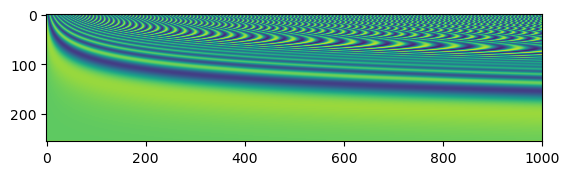

In [12]:
import matplotlib.pyplot as plt

plt.imshow(out.permute(1,0))